<a href="https://colab.research.google.com/github/KimaniBobby/Turkey-trips/blob/main/updated_group_project_noseless.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Statistical Analysis For Turkey Trips**

Data required:

1.   Travel Routes that are purchase most frequently for all customers
2.   Travel routes that are purchased most frequently by men vs women
3.   Travel routes that are purchased most frequently normal vs student
4.   Companies that are preferered most frequently for each type of customer (man vs woman, normal vs student)
5.   Seasons, months or national holidays that people travel ost frequently for each type of customer (man vs woman, normal vs student)



# **1).   Travel Routes that are purchase most frequently for all customers**

In [1]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read the Cleaned CSV data

In [3]:
travel= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/travel_dataset_cleaning_1_2.csv',encoding= 'unicode_escape')
holiday=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/holiday_names.csv',encoding= 'unicode_escape')

In [4]:
travel.head() # display the first 5 entries of the mounted csv file

,ï»¿travel_company,local_time,months,traveller_type,office_location,departure_point,arrival_point,seat_state,transaction_details,seat_no,ticket_price,travel_type,no_ticket_purchased_other_customers_same_vehicle
0,343,21/01/2014,January,normal,11-nisan (aligor),aligor,serik,man,30:05.0,3,70.0,stops_in_rest_area,52
1,476,23/01/2012,January,normal,acigol,acigol,istanbul,man,41:40.0,49,50.0,stops_in_rest_area,53
2,476,20/01/2015,January,normal,acigol,acigol,istanbul,man,37:40.0,35,50.0,stops_in_rest_area,48
3,476,20/01/2015,January,normal,acigol,acigol,istanbul,man,37:40.0,36,50.0,stops_in_rest_area,48
4,476,20/01/2015,January,normal,acigol,acigol,istanbul,man,36:53.0,38,50.0,stops_in_rest_area,48


In [5]:
holiday.head() #display the first 5 entries of Turkish holidays csv 

,ï»¿2012,2013,2014,2015,holiday_name
0,01/01/2012,01/01/2013,01/01/2014,01/01/2015,New Year's Day
1,20/03/2012,20/03/2013,20/03/2014,20/03/2015,March Equinox
2,23/04/2012,23/04/2013,23/04/2014,23/04/2015,National Sovereignty and Children's Day
3,01/05/2012,01/05/2013,01/05/2014,01/05/2015,Labor and Solidarity Day
4,19/05/2012,19/05/2013,19/05/2014,19/05/2015,"Commemoration of Ataturk, Youth and Sports Day"


# a.) Mode (Calculate the most occuring travel route and print the name instead of the number of occurences)

In [6]:
travel['departure_point'].value_counts()

ankara       9390
istanbul     8246
adana        4215
kayseri      4197
izmir        3121
             ... 
hastahane       1
gomec           1
dargecit        1
kerkuk          1
mecitozu        1
Name: departure_point, Length: 483, dtype: int64

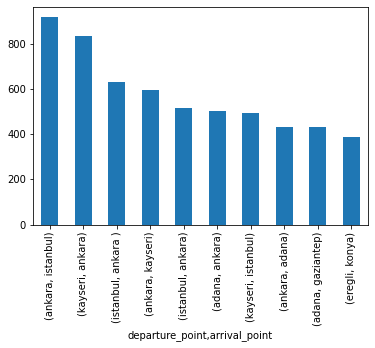

In [7]:
travel[(['departure_point','arrival_point'])].value_counts()[:10].plot(kind='bar');


In [8]:
travel[(['departure_point','arrival_point'])].value_counts().sum


<bound method NDFrame._add_numeric_operations.<locals>.sum of departure_point  arrival_point
ankara           istanbul         917
kayseri          ankara           833
istanbul         ankara           632
ankara           kayseri          597
istanbul         ankara           517
                                 ... 
bandirma         bucak              1
samsun           arakli             1
istanbul         egirdir            1
kozan            adapazari          1
payas            bozuyuk            1
Length: 9085, dtype: int64>

In [9]:
travel[(['departure_point','arrival_point'])]


,departure_point,arrival_point
0,aligor,serik
1,acigol,istanbul
2,acigol,istanbul
3,acigol,istanbul
4,acigol,istanbul
...,...,...
99917,yozgat,antalya
99918,yozgat,istanbul
99919,yozgat,gaziantep
99920,zonguldak,istanbul


Based on the data obtained from the bar graph above, the most popular area based on analysis of departure and arrival point across Istanbul, the route of Kayseri-ankara is the most preferrable route.

In [10]:
print("The most popular of routes amongst both genders is:",travel.value_counts(["departure_point","arrival_point"]).idxmax())

The most popular of routes amongst both genders is: ('ankara', 'istanbul')


In [11]:
print("The least popular of routes amongst both genders is:",travel.value_counts(["departure_point","arrival_point"]).idxmin())

The least popular of routes amongst both genders is: ('susurluk', 'ankara')



# **2.Companies that are preferred most frequently**

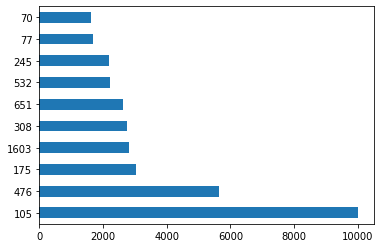

In [12]:
travel['ï»¿travel_company'].value_counts()[:10].plot(kind='barh');

The best travel company choice amongst both seat states(man/woman) is 105

In [13]:
print('The most preferred company for travel by both genders is',travel['ï»¿travel_company'].value_counts().idxmax())

The most preferred company for travel by both genders is 105


In [14]:
print('The least preferred company for travel by both genders is',travel['ï»¿travel_company'].value_counts().idxmin())

The least preferred company for travel by both genders is 1330


# **2. (a) Travel routes that are purchased most frequently (men vs women)


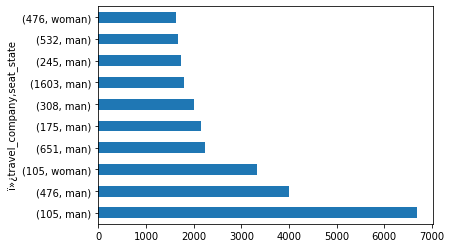

In [15]:
travel[(['ï»¿travel_company','seat_state'])].value_counts()[:10].plot(kind='barh');

As per the graph analysis,the most preferred company choice by seat state (man) is 105 with the most preferred by seat state (woman) is 476. 

# **2. (b) Most popular months travelled by seat state (Gender)**

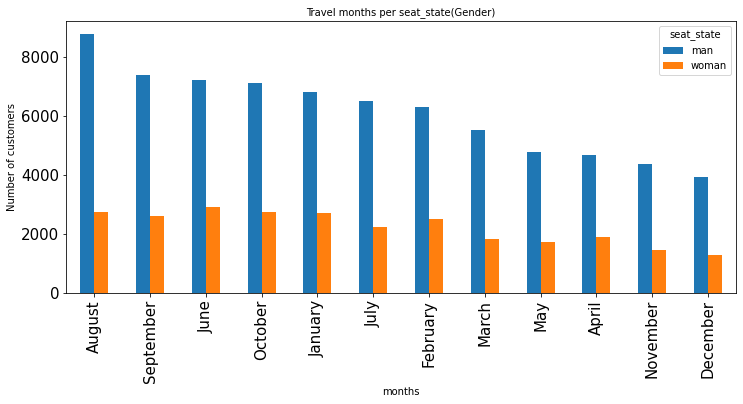

In [16]:
fig, ax = plt.subplots(figsize=(12, 5))
plt. title("Travel months per seat_state(Gender)", fontsize=10)
plt. ylabel ("Number of customers", fontsize=10)
travel.groupby([ "months", "seat_state"]) .size().unstack( "seat_state").sort_values (ascending=False, by="man") .plot(kind="bar",ax=ax, fontsize=15)
plt. xlabel ("months", fontsize=10)
plt. show( )

The month with the highest number of men travelling is August with the lowest being December
The month with the highest number of women travelling is June

# 2. (c) Most travelled routes by seat state (Gender)

This will see a creation of a new column routes which combines both departure point and arrival point

**Create a new column route to assist in identifying popular routes** 

In [17]:
travel["route"] = travel["departure_point"] + "-" + travel["arrival_point"]#combines both departure point and arrival point

In [18]:
travel.tail()#confirm the column route has been added to the travel data frame

,ï»¿travel_company,local_time,months,traveller_type,office_location,departure_point,arrival_point,seat_state,transaction_details,seat_no,ticket_price,travel_type,no_ticket_purchased_other_customers_same_vehicle,route
99917,112,18/12/2014,December,normal,yozgat,yozgat,antalya,man,04:31.0,44,59.0,stops_in_rest_area,49,yozgat-antalya
99918,322,18/12/2014,December,normal,internet,yozgat,istanbul,woman,25:17.0,35,65.0,stops_in_rest_area,47,yozgat-istanbul
99919,476,29/12/2014,December,normal,yozgat,yozgat,gaziantep,man,02:24.0,32,50.0,stops_in_rest_area,58,yozgat-gaziantep
99920,105,01/12/2014,December,normal,zonguldak,zonguldak,istanbul,woman,29:55.0,5,45.0,stops_in_rest_area,28,zonguldak-istanbul
99921,105,01/12/2014,December,normal,zonguldak,zonguldak,istanbul,woman,29:55.0,6,45.0,stops_in_rest_area,28,zonguldak-istanbul


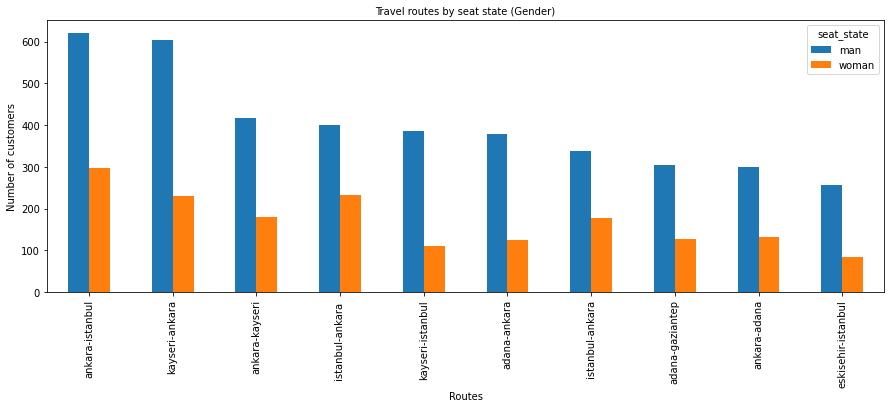

In [19]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title("Travel routes by seat state (Gender)",fontsize=10)
plt.ylabel("Number of customers",fontsize=10)
travel.groupby(["route","seat_state"]).size().unstack("seat_state").sort_values(ascending=False,by="man")[:10].plot(kind="bar",ax=ax,fontsize=10)#groups by route and seat state(gender)
plt.xlabel("Routes",fontsize=10)
plt.show()

In [20]:
travel.head()

,ï»¿travel_company,local_time,months,traveller_type,office_location,departure_point,arrival_point,seat_state,transaction_details,seat_no,ticket_price,travel_type,no_ticket_purchased_other_customers_same_vehicle,route
0,343,21/01/2014,January,normal,11-nisan (aligor),aligor,serik,man,30:05.0,3,70.0,stops_in_rest_area,52,aligor-serik
1,476,23/01/2012,January,normal,acigol,acigol,istanbul,man,41:40.0,49,50.0,stops_in_rest_area,53,acigol-istanbul
2,476,20/01/2015,January,normal,acigol,acigol,istanbul,man,37:40.0,35,50.0,stops_in_rest_area,48,acigol-istanbul
3,476,20/01/2015,January,normal,acigol,acigol,istanbul,man,37:40.0,36,50.0,stops_in_rest_area,48,acigol-istanbul
4,476,20/01/2015,January,normal,acigol,acigol,istanbul,man,36:53.0,38,50.0,stops_in_rest_area,48,acigol-istanbul


In [21]:
travel.groupby(["route","seat_state"]).size().unstack("seat_state").idxmax()

seat_state
man      ankara-istanbul
woman    ankara-istanbul
dtype: object

# 3. Travel routes that are purchased most frequently (normal/student/handicapped)




In [22]:
#travel.groupby(['arrival_point', 'traveller_type'])['arrival_point'].count().idxmax()

travel['traveller_type'].value_counts()

normal         99035
child            422
handicapped      385
student           80
Name: traveller_type, dtype: int64

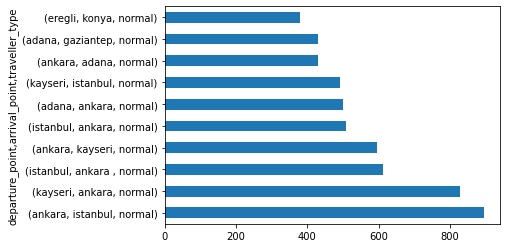

In [23]:
travel[(['departure_point','arrival_point','traveller_type'])].value_counts()[:10].plot(kind='barh');


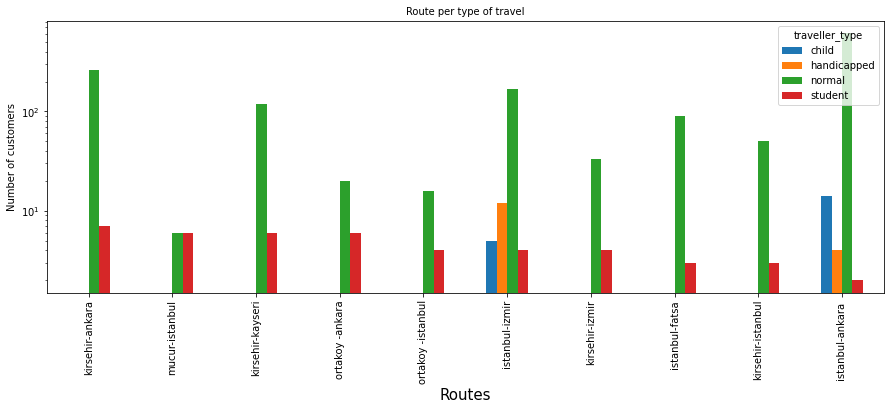

In [24]:
fig, ax = plt.subplots(figsize=(15, 5))
plt.title("Route per type of travel",fontsize=10)
plt.ylabel("Number of customers",fontsize=10)
travel.groupby(["route","traveller_type"]).size().unstack().sort_values(ascending=False,by="student")[:10].plot(kind="bar",ax=ax,fontsize=10,logy=True)
plt.xlabel("Routes",fontsize=15)
plt.show()

In [25]:
travel[(['departure_point','arrival_point','traveller_type'])].value_counts()

departure_point  arrival_point  traveller_type
ankara           istanbul       normal            894
kayseri          ankara         normal            829
istanbul         ankara         normal            612
ankara           kayseri        normal            595
istanbul         ankara         normal            508
                                                 ... 
bandirma         bucak          normal              1
kahramanmaras    kutahya        normal              1
payas            bozuyuk        normal              1
kahramanmaras    keskin         normal              1
bursa            bozuyuk        normal              1
Length: 9577, dtype: int64

In [26]:
print("The most popular route by traveller type is:",travel[(['departure_point','arrival_point','traveller_type'])].value_counts().idxmax())

The most popular route by traveller type is: ('ankara', 'istanbul', 'normal')


In [27]:
print("The most popular route by traveller type is:",travel.groupby(["route","traveller_type"]).size().unstack("traveller_type").idxmax())

The most popular route by traveller type is: traveller_type
child          ankara-istanbul
handicapped    izmir-balikesir
normal         ankara-istanbul
student        kirsehir-ankara
dtype: object


In [28]:
print("The least popular route by traveller type is:",travel.groupby(["route","traveller_type"]).size().unstack("traveller_type").idxmin())

The least popular route by traveller type is: traveller_type
child             adana-izmir
handicapped    acigol-dudullu
normal            37395-corum
student          ankara-fatsa
dtype: object


In [29]:
print("The least popular route by traveller type is:",travel[(['departure_point','arrival_point','traveller_type'])].value_counts().idxmin())

The least popular route by traveller type is: ('amasya', 'mardin', 'normal')


In [30]:
#travel.groupby(['arrival_point', 'traveller_type'])['traveller_type'].count()

**Travel routes that are purchased the least frequently**

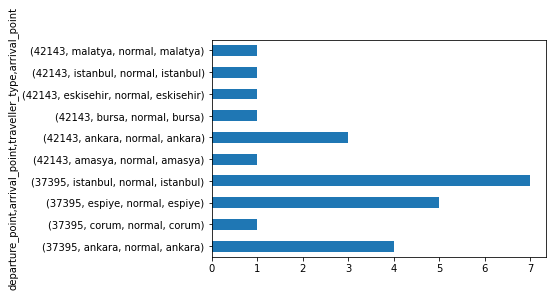

In [31]:
travel.groupby(['departure_point','arrival_point', 'traveller_type'])['arrival_point'].value_counts()[:10].plot(kind='barh');

In [32]:
travel.groupby(['departure_point','arrival_point', 'traveller_type'])['arrival_point'].count().idxmin()

('37395', 'corum', 'normal')

**4. Travel Company preferred most frequently**

In [33]:
#plt.title("Travel companies per gender",fontsize=10)
#plt.ylabel("Number of customers",fontsize=10)
#travel.groupby(['ï»¿travel_company', 'seat_state'])['seat_state'].count()[:10].plot(kind='barh')
#plt.xlabel("Travel Company",fontsize=10)

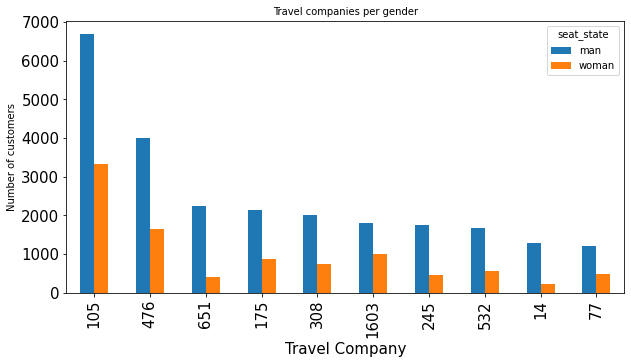

In [34]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Travel companies per gender",fontsize=10)
plt.ylabel("Number of customers",fontsize=10)
travel.groupby(["ï»¿travel_company","seat_state"]).size().unstack("seat_state").sort_values(ascending=False,by="man")[:10].plot(kind="bar",ax=ax,fontsize=15)
plt.xlabel("Travel Company",fontsize=15)
plt.show()

In [35]:
travel.groupby(['ï»¿travel_company', 'seat_state'])['seat_state'].count().idxmax()

(105, 'man')

In [36]:
travel.groupby(["ï»¿travel_company","seat_state"]).size().unstack("seat_state").idxmax()

seat_state
man      105
woman    105
dtype: int64

In [37]:
travel.groupby(["ï»¿travel_company","seat_state"]).size().unstack("seat_state").idxmin()

seat_state
man      644
woman    560
dtype: int64

In [38]:
travel.groupby(['ï»¿travel_company', 'seat_state'])['seat_state'].count().idxmin()

(560, 'woman')

In [39]:
#frequently_travelled =travel.groupby(['seat_state','traveller_type','local_time']).count()
#frequently_travelled.sort_values(by='local_time',ascending = False)

**Travel on A month by Month basis**

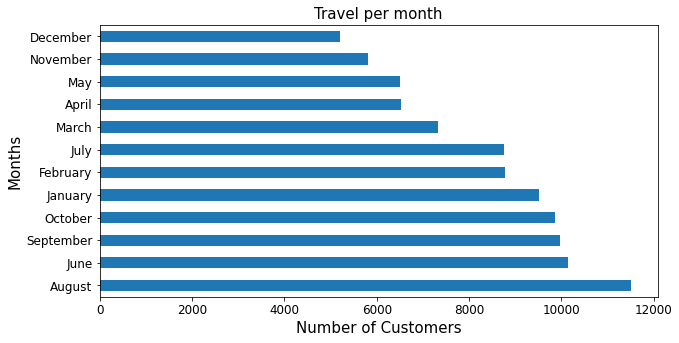

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Travel per month",fontsize=15)
plt.ylabel("Months",fontsize=15)
time=travel["months"].value_counts()
time.plot(kind="barh",ax=ax,fontsize=12)
plt.xlabel("Number of Customers",fontsize=15)
plt.show()

**Months preferred by Seat State(Gender)**

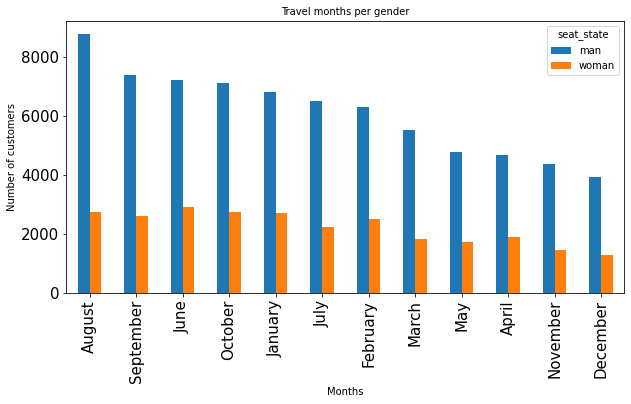

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Travel months per gender",fontsize=10)
plt.ylabel("Number of customers",fontsize=10)
travel.groupby(["months","seat_state"]).size().unstack("seat_state").sort_values(ascending=False,by="man").plot(kind="bar",ax=ax,fontsize=15)
plt.xlabel("Months",fontsize=10)
plt.show()

**Months preferred per type of travel(Normal,Student,Handicapped,Child)**

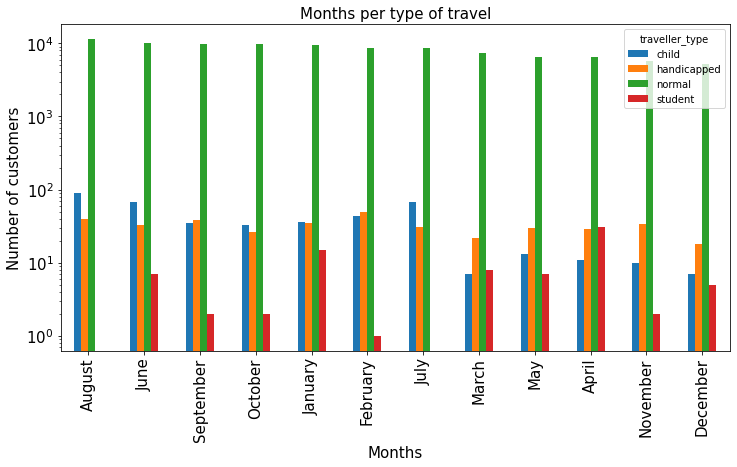

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title("Months per type of travel",fontsize=15)
plt.ylabel("Number of customers",fontsize=15)
travel.groupby(["months","traveller_type"]).size().unstack().sort_values(ascending=False,by="normal").plot(kind="bar",ax=ax,fontsize=15,logy=True)
plt.xlabel("Months",fontsize=15)
plt.show()

**Holidays most preferred for travel**

In [43]:

travel['year'] = pd.DatetimeIndex(travel['local_time']).year
# get date from travel timestamp and convert to string format
travel['date'] = pd.to_datetime(travel['local_time']).dt.strftime('%d/%m/%Y')

In [44]:
travel.head()

,ï»¿travel_company,local_time,months,traveller_type,office_location,departure_point,arrival_point,seat_state,transaction_details,seat_no,ticket_price,travel_type,no_ticket_purchased_other_customers_same_vehicle,route,year,date
0,343,21/01/2014,January,normal,11-nisan (aligor),aligor,serik,man,30:05.0,3,70.0,stops_in_rest_area,52,aligor-serik,2014,21/01/2014
1,476,23/01/2012,January,normal,acigol,acigol,istanbul,man,41:40.0,49,50.0,stops_in_rest_area,53,acigol-istanbul,2012,23/01/2012
2,476,20/01/2015,January,normal,acigol,acigol,istanbul,man,37:40.0,35,50.0,stops_in_rest_area,48,acigol-istanbul,2015,20/01/2015
3,476,20/01/2015,January,normal,acigol,acigol,istanbul,man,37:40.0,36,50.0,stops_in_rest_area,48,acigol-istanbul,2015,20/01/2015
4,476,20/01/2015,January,normal,acigol,acigol,istanbul,man,36:53.0,38,50.0,stops_in_rest_area,48,acigol-istanbul,2015,20/01/2015


In [45]:
travel['holiday'] = travel["date"] 

In [46]:
for row in holiday.iterrows(): #for loop to go through the dates and replace them with the holiday names instead of the date formats(dd/mm/yyyy)
  
    #print(row[1].values)
    #gets the values of one row in a list
    #old_values =values[:3]
    #new_values =values[4]
    

    values = row[1].values

    travel['holiday'] = travel["holiday"].replace(dict.fromkeys(values,values[4]))


travel_holidays = travel[travel['holiday'].isin(holiday['holiday_name'])]

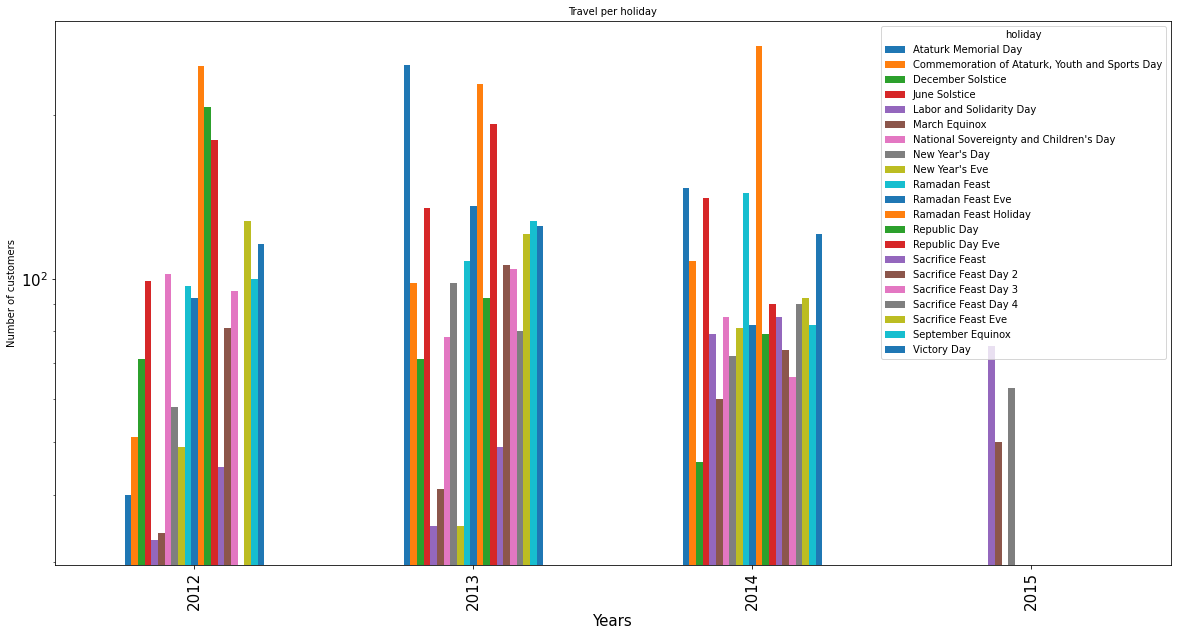

In [47]:
fig, ax2 = plt.subplots(figsize=(20, 10))
plt.title("Travel per holiday",fontsize=10)
plt.ylabel("Number of customers",fontsize=10)
travel_holidays.groupby(["holiday","year"]).size().unstack("holiday").sort_values(ascending=True,by="year").plot(kind='bar', ax=ax2,fontsize=15,logy=True)
plt.xlabel("Years",fontsize=15)
plt.show()

In [48]:
travel.head()

,ï»¿travel_company,local_time,months,traveller_type,office_location,departure_point,arrival_point,seat_state,transaction_details,seat_no,ticket_price,travel_type,no_ticket_purchased_other_customers_same_vehicle,route,year,date,holiday
0,343,21/01/2014,January,normal,11-nisan (aligor),aligor,serik,man,30:05.0,3,70.0,stops_in_rest_area,52,aligor-serik,2014,21/01/2014,21/01/2014
1,476,23/01/2012,January,normal,acigol,acigol,istanbul,man,41:40.0,49,50.0,stops_in_rest_area,53,acigol-istanbul,2012,23/01/2012,23/01/2012
2,476,20/01/2015,January,normal,acigol,acigol,istanbul,man,37:40.0,35,50.0,stops_in_rest_area,48,acigol-istanbul,2015,20/01/2015,20/01/2015
3,476,20/01/2015,January,normal,acigol,acigol,istanbul,man,37:40.0,36,50.0,stops_in_rest_area,48,acigol-istanbul,2015,20/01/2015,20/01/2015
4,476,20/01/2015,January,normal,acigol,acigol,istanbul,man,36:53.0,38,50.0,stops_in_rest_area,48,acigol-istanbul,2015,20/01/2015,20/01/2015
